# ***Objective***
    To develop a predictive model for early detection of cancer based on patient demographic data, medical history, and biomarker analysis, aiming to improve early diagnosis rates and personalized treatment plans. The model will utilize advanced machine learning algorithms to analyze patterns and correlations in large datasets, with the goal of identifying individuals at high risk for specific types of cancer before symptoms arise. The outcomes of this model will be validated through clinical trials and real-world data to ensure accuracy, reliability, and applicability in diverse healthcare settings.


# **Data Source**
Patient Demographics:
*    Age
*   gender
*   ethnicity
*   socioeconomic status

Medical History: Family history of cancer, previous diagnoses, comorbidities.

*   Family history of cancer
*   previous diagnoses
*   comorbiditie

Lifestyle Factors:
*   Smoking status
*   alcohol consumption
*   physical activity & diet

Clinical Data:
*   Tumor size
*   location and stage
*   grade, and histological type.

Laboratory Results:
*   Blood tests, biomarker levels
*   Ex:PSA levels for prostate cancer, HER2 status for breast cancer


Imaging Data:
*   MRI, CT scans, mammograms



Genetic Information: Genetic mutations (e.g., BRCA1/BRCA2 for breast cancer), genetic predisposition.


*   Genetic mutations
*   genetic predisposition.
(Ex:BRCA1/BRCA2 for breast cancer)


In [ ]:
# Step 1 : import library
import pandas as pd

# **Import Data**

In [ ]:
# Step 2 : import data
cancer = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Cancer.csv')

In [ ]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# **Describe Data**

In [ ]:
cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

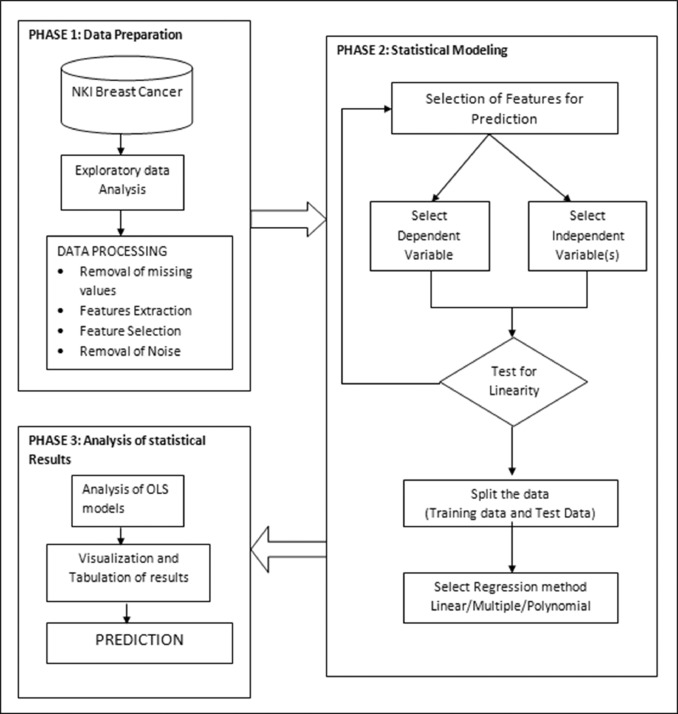

# Data Preprocessing
Cleaning: Handle missing values, outliers, and inconsistencies.
Normalization: Scale features to ensure comparability.
Feature Engineering: Create new features from existing data that might be relevant for prediction.

# ***Target Variable (y) and Feature Variables (X)***

In [ ]:
y = cancer['diagnosis']

In [ ]:
X = cancer.drop(['id','diagnosis','Unnamed: 32'],axis=1)

# ***Train Test Split***

In [ ]:
# Step 4 : train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=2529)

In [ ]:
# check shape of train and test sample
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

# ***Modeling***

In [ ]:
# Step 5 : select model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)

In [ ]:
# Step 6 : train or fit model
model.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

In [ ]:
model.intercept_

array([-30.20269391])

In [ ]:
model.coef_

array([[-0.8644508 , -0.1823121 ,  0.26510852, -0.02688942,  0.13284582,
         0.19445151,  0.40918278,  0.20206338,  0.17199488,  0.03798515,
         0.0192444 , -1.13284188, -0.13597054,  0.11911954,  0.02266663,
        -0.03006638,  0.04691738,  0.02805721,  0.03329433, -0.00980702,
        -0.27140621,  0.44034405,  0.16566196,  0.01286379,  0.2719812 ,
         0.59704539,  1.06177846,  0.40903862,  0.51193487,  0.08436947]])

In [ ]:
# Step 7 : predict model
y_pred = model.predict(X_test)

In [ ]:
y_pred

array(['B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'M',
       'M', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B'], dtype=object)

# ***Model Evaluation***

In [ ]:
# Step 8 : model accuracy
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
confusion_matrix(y_test,y_pred)

array([[97,  5],
       [ 2, 67]])

In [ ]:
accuracy_score(y_test,y_pred)

0.9590643274853801

# ***Prediction***

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.98      0.95      0.97       102
           M       0.93      0.97      0.95        69

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



# ***Explaination***

### 1. **Objective**

The goal of cancer prediction is to identify individuals at risk of developing cancer or to predict the progression of cancer in diagnosed patients. Accurate predictions can lead to early intervention, personalized treatment plans, and improved outcomes.

### 2. **Types of Cancer Prediction**

- **Risk Prediction**: Estimating the likelihood of developing cancer based on personal and genetic factors.
- **Progression Prediction**: Estimating how likely a cancer will progress or spread, often used for staging and treatment planning.
- **Survival Prediction**: Predicting the likelihood of survival based on various factors, including treatment response and tumor characteristics.

### 3. **Data Sources and Features**

To make predictions, various data types are used:

- **Patient Demographics**: Age, gender, ethnicity, and other personal characteristics.
- **Medical History**: Previous cancer diagnoses, family history of cancer, and other health conditions.
- **Lifestyle Factors**: Smoking status, alcohol consumption, physical activity, and diet.
- **Clinical Data**: Information from medical imaging (CT scans, MRI), biopsy results, tumor size, and grade.
- **Laboratory Results**: Blood tests, levels of specific biomarkers (e.g., PSA levels for prostate cancer, HER2 status for breast cancer).
- **Genetic Information**: Presence of specific genetic mutations (e.g., BRCA1/BRCA2 for breast cancer).

### 4. **Data Collection**

Data can be collected from various sources:

- **Medical Records**: Patient records from hospitals and clinics.
- **Public Databases**: Databases like The Cancer Genome Atlas (TCGA) or SEER that provide large datasets for research.
- **Clinical Trials**: Data from studies evaluating new treatments or diagnostic tools.

### 5. **Data Processing and Preparation**

Before using data for prediction, it needs to be processed:

- **Data Cleaning**: Removing or correcting errors, handling missing values.
- **Normalization**: Scaling features to ensure consistency.
- **Feature Selection**: Identifying the most relevant features for prediction.

### 6. **Model Development**

Machine learning models are used to predict cancer risk or progression:

- **Feature Engineering**: Creating new features from existing data to improve model performance.
- **Model Training**: Using algorithms like logistic regression, decision trees, random forests, or neural networks to train the model on historical data.
- **Model Validation**: Evaluating the model's performance using metrics like accuracy, precision, recall, and area under the curve (AUC).

### 7. **Prediction and Interpretation**

- **Risk Scores**: The model provides a risk score or probability indicating the likelihood of developing cancer.
- **Risk Categories**: Patients might be categorized into risk groups (e.g., low, moderate, high) based on their prediction score.
- **Clinical Integration**: Predictions are used alongside other clinical data to make informed decisions about patient care.

### 8. **Ethical and Practical Considerations**

- **Data Privacy**: Ensuring patient data is protected and used responsibly.
- **Bias and Fairness**: Addressing potential biases in data and ensuring predictions are equitable across different populations.
- **Clinical Validation**: Ensuring that predictive models are validated and tested in real-world settings before being used in clinical practice.

### 9. **Applications in Healthcare**

- **Early Screening**: Identifying individuals at high risk for early screening and preventive measures.
- **Personalized Treatment**: Tailoring treatment plans based on predicted risk and individual characteristics.
- **Outcome Prediction**: Informing patients and clinicians about expected outcomes and prognosis.

### Example Workflow for a Cancer Prediction Model

1. **Data Collection**: Gather patient data from medical records, genetic tests, and lifestyle surveys.
2. **Data Preparation**: Clean and preprocess data, handling missing values and normalizing features.
3. **Model Training**: Use machine learning algorithms to train a model on historical data.
4. **Validation**: Evaluate model performance with separate test data and refine as needed.
5. **Prediction**: Apply the model to new patient data to generate risk scores.
6. **Clinical Use**: Integrate predictions into patient care plans and monitor outcomes.

By leveraging diverse data sources and advanced analytics, cancer prediction models aim to enhance early detection, improve patient outcomes, and optimize treatment strategies.